In [2]:
import numpy as np
import pandas as pd

In [3]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

C:\Users\ruhan\AppData\Local\Temp\ipykernel_15764\2055901106.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

In [13]:
books.shape

(271360, 8)

In [14]:
ratings.shape

(1149780, 3)

In [15]:
users.shape

(278858, 3)

#EDA 

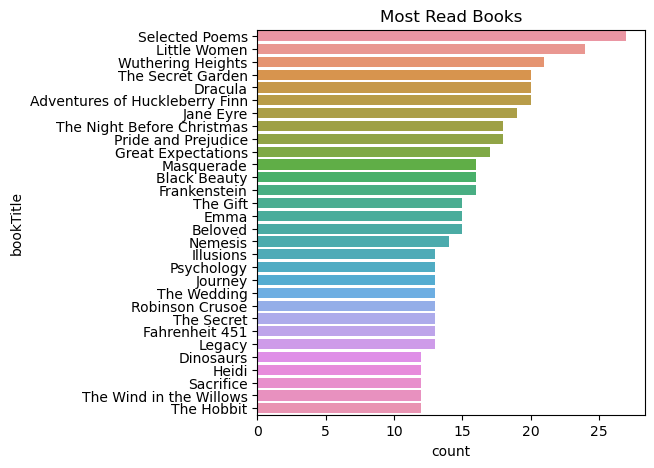

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

most_read = books['Book-Title'].value_counts().head(30).reset_index()
most_read.columns = ['bookTitle', 'count']

plt.figure(figsize=(5, 5))
plt.title("Most Read Books")
sns.barplot(x='count', y='bookTitle', data=most_read)
plt.show()

In [17]:
merged_data = pd.merge(books, ratings, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0


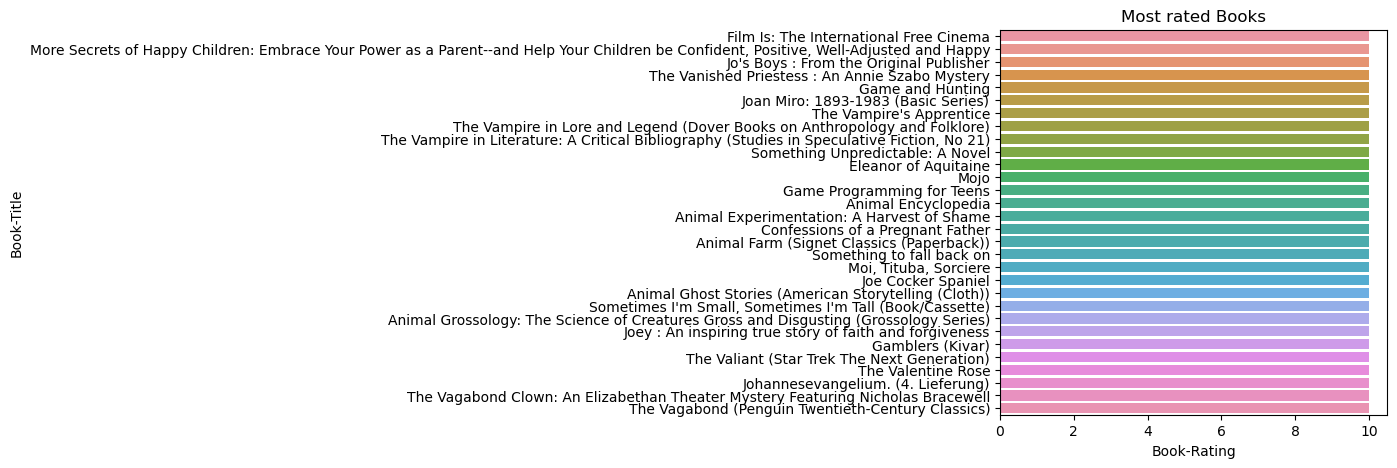

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_rated = merged_data[['Book-Title', 'Book-Rating']]
top_rated = top_rated.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
top_rated = top_rated.sort_values('Book-Rating', ascending=False).reset_index()
top_rated = top_rated[['Book-Title', 'Book-Rating']]

plt.figure(figsize=(5, 5))
plt.title("Most rated Books")
sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated.head(30))
plt.show()


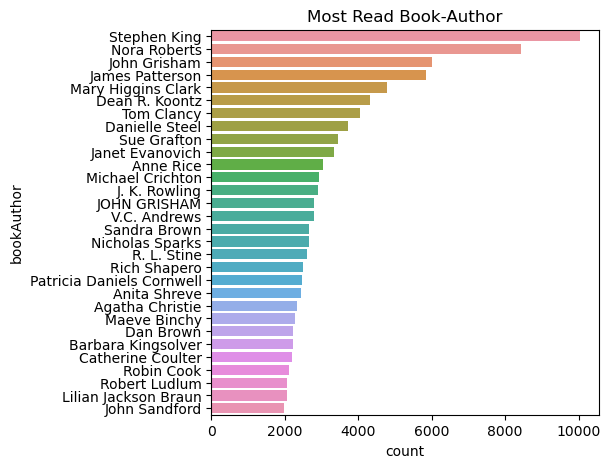

In [19]:
most_read_Book_Author = merged_data['Book-Author'].value_counts().head(30).reset_index()
most_read_Book_Author.columns = ['bookAuthor', 'count']

plt.figure(figsize=(5, 5))
plt.title("Most Read Book-Author")
sns.barplot(x='count', y='bookAuthor', data=most_read_Book_Author)
plt.show()


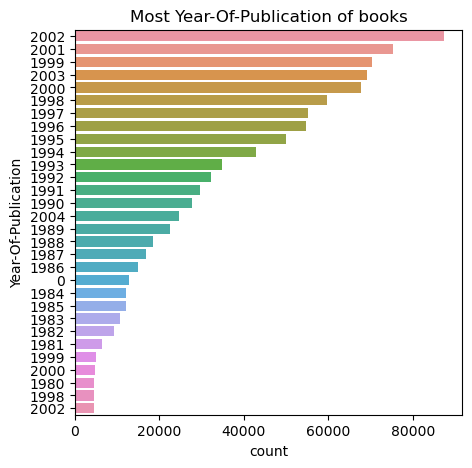

In [20]:
most_Year_Of_Publication = merged_data['Year-Of-Publication'].value_counts().head(30).reset_index()
most_Year_Of_Publication.columns = ['Year-Of-Publication', 'count']

plt.figure(figsize=(5, 5))
plt.title("Most Year-Of-Publication of books")
sns.barplot(x='count', y='Year-Of-Publication', data=most_Year_Of_Publication)
plt.show()


# POPULARITY BASED POPULARITY SYSTEM

In [21]:
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0


In [22]:
num_rating_df = merged_data.groupby("Book-Title").count()["Book-Rating"].reset_index()
num_rating_df.rename(columns={"Book-Rating":"Num-Rating"},inplace=True)
num_rating_df

,Book-Title,Num-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [23]:
avg_rating_df = merged_data.groupby("Book-Title").mean()["Book-Rating"].reset_index()
avg_rating_df.rename(columns={"Book-Rating":"avg-Rating"},inplace=True)
avg_rating_df

C:\Users\ruhan\AppData\Local\Temp\ipykernel_15764\1558119200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = merged_data.groupby("Book-Title").mean()["Book-Rating"].reset_index()


,Book-Title,avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [24]:
popular_df=num_rating_df.merge(avg_rating_df,on="Book-Title")
popular_df

,Book-Title,Num-Rating,avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [25]:
popular_df=popular_df[popular_df["Num-Rating"]>250].sort_values("avg-Rating",ascending=False).head(50)
popular_df

,Book-Title,Num-Rating,avg-Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


# COLABORATIVE FILTERING

In [26]:
merged_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0
...,...,...,...,...,...,...,...,...,...,...
670608,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,264317,0
937591,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,100906,0
828933,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,100088,0
916406,B0002JV9PY,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,179791,0


In [27]:
x = merged_data.groupby("User-ID").count()['Book-Rating'] > 200
good_user = x[x].index

In [28]:
filtered_ratings = merged_data[merged_data['User-ID'].isin(good_user)]

In [29]:
y = filtered_ratings.groupby("Book-Title").count()['Book-Rating'] > 50
famous_books = y[y].index

In [30]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [31]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [32]:
final_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
307405,0001047973,Brave New World,Aldous Huxley,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,23902,9
921794,0006177379,Secrets,Vera Cowie,1990,HarperCollins Publishers,http://images.amazon.com/images/P/0006177379.0...,http://images.amazon.com/images/P/0006177379.0...,http://images.amazon.com/images/P/0006177379.0...,110029,0
996321,0020697406,The Lost World,Randall Jarrell,1985,Simon &amp; Schuster,http://images.amazon.com/images/P/0020697406.0...,http://images.amazon.com/images/P/0020697406.0...,http://images.amazon.com/images/P/0020697406.0...,149907,0
139443,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,126604,0
139388,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,26535,0


In [33]:
pt = final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [34]:
pt.fillna(0,inplace=True)

In [35]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_score = cosine_similarity(pt)

In [38]:
similarity_score.shape

(679, 679)

In [39]:
def recommend(book_name):
    #fetch index of the book
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key = lambda x: x[1],reverse=True)[1:6]
    for i in similar_items:
        print(pt.index[i[0]])

In [40]:
recommend("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes
